## Introduction to Modeling with Python

Now that we have seen some examples of modeling and using Python for modeling, we wanted to give you a chance to try your hand!

To that goal, we choose a well structured problem with plenty of resources online to help you along the way. That problem is predicting housing prices and is hosted on Kaggle:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

First, make sure you are signed up on Kaggle and then download the data:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

The data includes both testing and training sets as well as a sample submission file. 

Your goal is the predict the sales price for each house where root mean squared error is the evaluation metric. To get some ideas on where to start, feel free to check out Kaggle Kernels:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

And the discussion board:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion

Again - the goal of this homework is to get you exposed to modeling with Python. Feel free to use online resources to help guide you, but we expect original thought as well. Our hope is by the end of this homework you will feel comfortable exploring data in Python and building models to make predictions. Also please submit your test results to Kaggle and let us know your ranking and score!


### Grading

This homework is due **Feb. 20, 2018 by 3:00pm Utah time.** By that time, you need to have committed all your code to your github and submitted a link to your work to the TA. We can see on your Github account when you last committed code. :)

Rubric:

* Code Quality - 10%
* Storytelling - 10%
* Result on Kaggle - 5%
* Describing, Cleaning, and Visualizing data - 25%
* Modeling - 50%

More specifically, for modeling we will look for: 

* Model Selection: Did you try multiple models? Why did you choose these models? How do they work? What are their assumptions? And how did you test/account for them? How did you select hyper-parameters?
* Model interpretation: What do the model results tell you? Which variables are important? High bias or variance and how did you / could you fix this? How confident are you in your results? 
* Model usefulness: Do you think your final model was useful? If so, how would you recommend using it? Convince us, that if we were a company, we would feel comfortable using your model with our users. Think about edge cases as well - are there certain areas that the model performs poorly on? Best on? How would you handle these cases, if say Zillow wanted to leverage your model realizing that bad recommendations on sale prices would hurt customer trust and your brand. This section also falls into the storytelling aspect of the grading.

In [998]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
import seaborn as sns #plt.style.use(“seaborn”)
%matplotlib inline
from scipy import stats
#from statsmodels.iolib.summary2 import summary_col
#summary_col([reg0,reg1,reg2,reg3,reg4])
#from pandas.core import datetools
#pandas.tseries module

My goal is to create a model that predicts housing prices well even outside of sample.  First I'll read in the train and test data.

In [999]:
train=pd.read_csv('train.csv')
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [1000]:
test=pd.read_csv('test.csv')
test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


I notice that SalePrice is not included in the Kaggle Testing set.  I need to split off a subset of my training set so I can test how accurate my models' predictions for Sale Price are.

In [1001]:
#X_train, X_test, y_train, y_test = train_test_split(train, train['SalePrice'], test_size=.20, random_state=42)

Here y-train is my target and I will begin by cleaning X_train.

### **Data Cleaning**

I will isolate the variables for which over 50% of the observations are grouped in one category.  I classify these variables as dropped and will not include them in my  models.

In [1002]:
dropped = []
for i in train:
   if train[i].dtype == 'object':
       if train[i].value_counts(normalize=True, dropna= False).iloc[0] > .5:
            #print (train[i].value_counts(normalize=True))
            dropped.append(i)

From the documentation provided by Kaggle, I can see that Central Air is a binary variable for whether or not the home has air conditioning.  I don't actually want to drop this because it might be a good indicator of home value and almost certainly more than 50% of homes into either the yes or no category.

In [1003]:
dropped.remove('CentralAir')

I'm also going to put the dropped array into a format that is easier to work with later. 

In [1004]:
dropped=train[['Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']]

I carefully look through the documentation and make some determinations about the categorigal and quantitative variables I have to work with.  There are many categorical variables I can productively convert to dummy variables and a few I may be able to convert to meaningful quantitative variables.  Some qualitative variables such as OverallQual follow a Likert scale and already make sense as quantitatve variables.  I will start by converting MSZoning, Utilities, Neighborhood, RoofStyle, RoofMatl, Exterior1st, BsmtFinType1, FireplaceQu into dummy variables. 

MS Subclass- group by # of stories

Include- LotFrontage, LotArea, OverallQual, OverallCond, MasVnrArea, Foundation, BsmtQual, BasFinSF1,TotalBsmtSF, Fireplaces, CentralAir, FullBath, HalfBath, Bedroom, Kitchen, WoodDeckSF, OpenPorchSF, EnclosedPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, YearBuilt, YearRemodAdd

Make Quantitative- HouseStyle

In [1005]:
train=pd.get_dummies(train, columns=['MSZoning','Utilities','Neighborhood','RoofStyle',
                                   'RoofMatl','Exterior1st', 'BsmtFinType1','FireplaceQu','PavedDrive','Foundation',
                                     'CentralAir'], 
               prefix=['Zone','Utilities','Neighborhood','RoofStyle','RoofMatl','Exterior','BsmtFinish','FireplaceQu',
                       'Paving','Foundation','CentralAir'])
train.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Paving_P,Paving_Y,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_N,CentralAir_Y
0,1,60,65.0,8450,Pave,NaN,Reg,Lvl,Inside,Gtl,...,0,1,0,0,1,0,0,0,0,1
1,2,20,80.0,9600,Pave,NaN,Reg,Lvl,FR2,Gtl,...,0,1,0,1,0,0,0,0,0,1
2,3,60,68.0,11250,Pave,NaN,IR1,Lvl,Inside,Gtl,...,0,1,0,0,1,0,0,0,0,1
3,4,70,60.0,9550,Pave,NaN,IR1,Lvl,Corner,Gtl,...,0,1,1,0,0,0,0,0,0,1
4,5,60,84.0,14260,Pave,NaN,IR1,Lvl,FR2,Gtl,...,0,1,0,0,1,0,0,0,0,1


A quick check to see if this worked properly:

In [1006]:
train.BsmtFinish_Rec.value_counts(dropna=False)

0    1327
1     133
Name: BsmtFinish_Rec, dtype: int64

Good!  Now I can take a look at making some of our other categorical variables quantitative.

In [1007]:
train.HouseStyle.value_counts(dropna=False)

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

The most meaningful information I draw from this variable is the number of stories in each home.  Nowhere in our data is this included as its own variable so I will take the opportunity to convert HouseStyle into a quantitative variable that will serve this purpose.  Note that the value counts in the unfinished categories are small.  I will pool these together with their finished counterparts.

In [1008]:
train['HouseStyle'] = train['HouseStyle'].map({'1Story': 1, '1.5Unf': 1.5, '1.5Fin':1.5, '2Story':2,'SFoyer':2,
                                              '2.5Unf':2.5,'2.5Fin':2.5, 'SLvl':2.5})

Here I classify Split-Foyer homes in the same quantitative category as two story homes because they are typically designed with a set of downward stairs and upwards stairs that lead out of the small foyer area into the two main levels of the home.  I likewise classify Split Level Homes (often called "Tri-Level" homes) in the same category as finished 2.5 story homes because they are often three levels with one level significantly smaller than the other two.

Let's see how this looks.

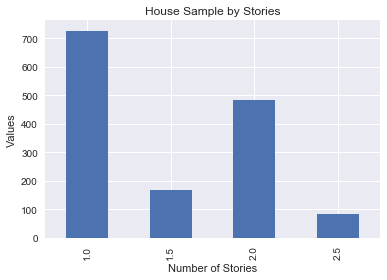

In [1009]:
train['HouseStyle'].value_counts().sort_index().plot(kind='bar',x=[1,1.5,2.0,2.5])
plt.title('House Sample by Stories')
#plt.xticks([1,1.5,2.0,2.5])
plt.ylabel('Values')
plt.xlabel('Number of Stories')

Let's take a look at another variable I considered including.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

Many of these categories communicate information about number of stories, which we have already reflected in our HouseStyle variable.  There is also some component of home age communicated in this data but only in broad distinctions (Pre and Post 1945) and this is not consistent across all categories.  For this reason, I will decline to include this variable in my models.

Let's take a look at BsmtQual--

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [1010]:
train.BsmtQual.value_counts(dropna=False)

TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

I intially considered converting this variable into dummies but because there are no houses in the poor category (in which a house could in theory be anywhere from 1 inch to 69 inches) I think it is reasonable to make this variable quantitative by mapping each category into its minimum height.  I will still create a mapping for poor in case a home outside our train sample has a poor basement, but I don't suspect it will be very common.  Less than 6 feet of basement height is pretty awful.

In [1011]:
train['BsmtQual'] = train['BsmtQual'].map({'Po':60, 'Fa':70, 'TA':80, 'Gd':90,'Ex':100})

In [1012]:
train['BsmtQual']=train['BsmtQual'].fillna(0)

In [1013]:
train['BsmtQual'].value_counts()

80.0     649
90.0     618
100.0    121
0.0       37
70.0      35
Name: BsmtQual, dtype: int64

Now that I've categorized my variables how I like, let's handle missing values.

In [1014]:
#train.isnull().any()
train.columns[train.isnull().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

After cross-checking this list with the list of variables I decided to drop from my regression, I determined that I need to handle missing values for LotFrontage, MasVnrArea, GarageYrBlt, GarageFinish, and BsmtQual.  Taking a glance at the value_counts I decide filling GarageFinish and BsmtQual with the mode and the rest with the mean is reasonable.

In [1015]:
train['GarageFinish']=train['GarageFinish'].fillna(train['GarageFinish'].mode())
train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].mean())
train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].mean())
train['GarageYrBlt']=train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())

In [1016]:
train['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [1017]:
train=pd.get_dummies(train, columns=['GarageFinish'])

In [1018]:
train['GarageFinish_Unf'].value_counts()

0    855
1    605
Name: GarageFinish_Unf, dtype: int64

Let's check that this cleared up our missing values.

In [1019]:
train['LotFrontage'].isnull().head(20)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: LotFrontage, dtype: bool

In [1020]:
#train.isnull().any()
train.columns[train.isnull().any()].tolist()

['Alley',
 'MasVnrType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [1021]:
train=train.drop(dropped,axis=1)

In [1022]:
train.dtypes

Id                     int64
MSSubClass             int64
LotFrontage          float64
LotArea                int64
HouseStyle           float64
OverallQual            int64
OverallCond            int64
YearBuilt              int64
YearRemodAdd           int64
Exterior2nd           object
MasVnrArea           float64
BsmtQual             float64
BsmtFinSF1             int64
BsmtFinSF2             int64
BsmtUnfSF              int64
TotalBsmtSF            int64
1stFlrSF               int64
2ndFlrSF               int64
LowQualFinSF           int64
GrLivArea              int64
BsmtFullBath           int64
BsmtHalfBath           int64
FullBath               int64
HalfBath               int64
BedroomAbvGr           int64
KitchenAbvGr           int64
TotRmsAbvGrd           int64
Fireplaces             int64
GarageYrBlt          float64
GarageCars             int64
                      ...   
Exterior_Stone         uint8
Exterior_Stucco        uint8
Exterior_VinylSd       uint8
Exterior_Wd Sd

Exterior2nd is still an object and probably not a huge driver of home value so I'm going to drop it from my data frame.

In [1023]:
train=train.drop(['Exterior2nd'],axis=1)

We may also be interested in the presence of outliers in our data.  Let's take a look at the sale prices in our data and determine whether any observations should be dropped before our analysis.

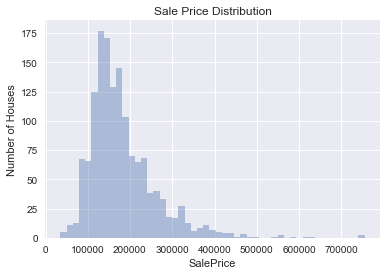

In [1024]:
sns.distplot(train.SalePrice, kde=False) #kde is kernel density estimate
plt.ylabel('Number of Houses')
plt.title('Sale Price Distribution')

It appears that most homes in our set close for about 100 to 250 thousand dollars.  We can use scipy tools to remove observations lying further than 3 standard deviations from the mean.

In [1025]:
#y_train.head()

In [1026]:
train=train[(np.abs(stats.zscore(train.SalePrice))<3)]

In [1027]:
#len(y_train)

In [1028]:
#len(X_train)

We can revisualize to see what has changed--

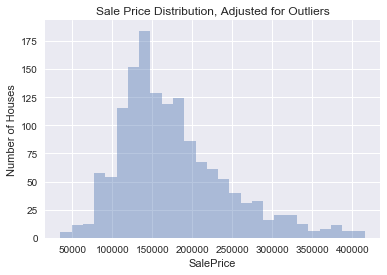

In [1029]:
sns.distplot(train.SalePrice, kde=False) #kde is kernel density estimate
plt.ylabel('Number of Houses')
plt.title('Sale Price Distribution, Adjusted for Outliers')

And observe that homes above $430,000 (roughly) have been dropped.  We are now ready to scale the data.

### **Scaling**

In [1030]:
#Ok to do after cleaning/filling in NaNs
scaler = StandardScaler()
scaler.fit(train) #learns mean and std dev for each variable
scaled_train = scaler.transform(train) #Subtracts mean and divides by std dev.
#scaled_Xtest= scaler.transform(X_test)

In [1031]:
train = pd.DataFrame(data=scaled_train, columns=train.columns)

In [1032]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_N,CentralAir_Y,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,-1.728655,0.069107,-0.218390,-0.196275,1.030758,0.711162,-0.520722,1.068894,0.892656,0.582176,...,-0.888007,1.138914,-0.130281,-0.06473,-0.045723,-0.265965,0.265965,-0.55325,1.567396,-0.851012
1,-1.726286,-0.871730,0.468814,-0.080602,-0.918263,-0.038582,2.169571,0.171364,-0.415154,-0.580458,...,1.126117,-0.878030,-0.130281,-0.06473,-0.045723,-0.265965,0.265965,-0.55325,1.567396,-0.851012
2,-1.723918,0.069107,-0.080949,0.085362,1.030758,0.711162,-0.520722,1.002410,0.844219,0.380494,...,-0.888007,1.138914,-0.130281,-0.06473,-0.045723,-0.265965,0.265965,-0.55325,1.567396,-0.851012
3,-1.721550,0.304316,-0.447458,-0.085632,1.030758,0.711162,-0.520722,-1.856388,-0.705778,-0.580458,...,-0.888007,-0.878030,-0.130281,-0.06473,-0.045723,-0.265965,0.265965,-0.55325,-0.638001,1.175072
4,-1.719181,0.069107,0.652068,0.388122,1.030758,1.460906,-0.520722,0.969168,0.747344,1.495674,...,-0.888007,1.138914,-0.130281,-0.06473,-0.045723,-0.265965,0.265965,-0.55325,1.567396,-0.851012


In [1033]:
train.sort_index().head()

,Id,MSSubClass,LotFrontage,LotArea,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,CentralAir_N,CentralAir_Y,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,-1.728655,0.069107,-0.218390,-0.196275,1.030758,0.711162,-0.520722,1.068894,0.892656,0.582176,...,-0.888007,1.138914,-0.130281,-0.06473,-0.045723,-0.265965,0.265965,-0.55325,1.567396,-0.851012
1,-1.726286,-0.871730,0.468814,-0.080602,-0.918263,-0.038582,2.169571,0.171364,-0.415154,-0.580458,...,1.126117,-0.878030,-0.130281,-0.06473,-0.045723,-0.265965,0.265965,-0.55325,1.567396,-0.851012
2,-1.723918,0.069107,-0.080949,0.085362,1.030758,0.711162,-0.520722,1.002410,0.844219,0.380494,...,-0.888007,1.138914,-0.130281,-0.06473,-0.045723,-0.265965,0.265965,-0.55325,1.567396,-0.851012
3,-1.721550,0.304316,-0.447458,-0.085632,1.030758,0.711162,-0.520722,-1.856388,-0.705778,-0.580458,...,-0.888007,-0.878030,-0.130281,-0.06473,-0.045723,-0.265965,0.265965,-0.55325,-0.638001,1.175072
4,-1.719181,0.069107,0.652068,0.388122,1.030758,1.460906,-0.520722,0.969168,0.747344,1.495674,...,-0.888007,1.138914,-0.130281,-0.06473,-0.045723,-0.265965,0.265965,-0.55325,1.567396,-0.851012


In [1034]:
controls=train[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'Foundation_BrkTil',
                'Foundation_CBlock','Foundation_PConc','Foundation_Slab','Foundation_Stone','Foundation_Wood',
                'TotalBsmtSF', 'Fireplaces','CentralAir_Y', 'FullBath', 'HalfBath','WoodDeckSF','OpenPorchSF',
                'EnclosedPorch', 'ScreenPorch','PoolArea', 'MiscVal','MoSold', 'YrSold', 'YearBuilt','YearRemodAdd',
                'Zone_C (all)','Zone_FV','Zone_RH','Zone_RL','Zone_RM','Utilities_AllPub','Utilities_NoSeWa',
                'Neighborhood_Blmngtn','Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide',
                'Neighborhood_ClearCr','Neighborhood_CollgCr','Neighborhood_Crawfor','Neighborhood_Edwards',
                'Neighborhood_Gilbert','Neighborhood_IDOTRR','Neighborhood_MeadowV','Neighborhood_Mitchel','Neighborhood_NAmes',
 'Neighborhood_NPkVill','Neighborhood_NWAmes','Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_OldTown',
 'Neighborhood_SWISU','Neighborhood_Sawyer','Neighborhood_SawyerW','Neighborhood_Somerst','Neighborhood_StoneBr',
 'Neighborhood_Timber','Neighborhood_Veenker','RoofStyle_Flat','RoofStyle_Gable','RoofStyle_Gambrel',
 'RoofStyle_Hip','RoofStyle_Mansard','RoofStyle_Shed','RoofMatl_ClyTile','RoofMatl_CompShg','RoofMatl_Metal',
 'RoofMatl_Roll','RoofMatl_Tar&Grv','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior_AsbShng','Exterior_AsphShn',
 'Exterior_BrkComm', 'BsmtQual','Exterior_BrkFace','Exterior_CBlock','Exterior_CemntBd','Exterior_HdBoard',
 'Exterior_ImStucc','Exterior_MetalSd','Exterior_Plywood','Exterior_Stone','Exterior_Stucco','Exterior_VinylSd',
 'Exterior_Wd Sdng','Exterior_WdShing','BsmtFinish_ALQ','BsmtFinish_BLQ','BsmtFinish_GLQ','BsmtFinish_LwQ',
 'BsmtFinish_Rec','BsmtFinish_Unf','FireplaceQu_Ex','FireplaceQu_Fa','FireplaceQu_Gd','FireplaceQu_Po',
 'FireplaceQu_TA','Paving_N','Paving_P','Paving_Y','BsmtQual']]

In [1035]:
controls.dtypes

LotFrontage          float64
LotArea              float64
OverallQual          float64
OverallCond          float64
MasVnrArea           float64
Foundation_BrkTil    float64
Foundation_CBlock    float64
Foundation_PConc     float64
Foundation_Slab      float64
Foundation_Stone     float64
Foundation_Wood      float64
TotalBsmtSF          float64
Fireplaces           float64
CentralAir_Y         float64
FullBath             float64
HalfBath             float64
WoodDeckSF           float64
OpenPorchSF          float64
EnclosedPorch        float64
ScreenPorch          float64
PoolArea             float64
MiscVal              float64
MoSold               float64
YrSold               float64
YearBuilt            float64
YearRemodAdd         float64
Zone_C (all)         float64
Zone_FV              float64
Zone_RH              float64
Zone_RL              float64
                      ...   
Exterior_AsphShn     float64
Exterior_BrkComm     float64
BsmtQual             float64
Exterior_BrkFa

In [1036]:
#y_train.head()

In [1037]:
controls.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,...,BsmtFinish_Unf,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,Paving_N,Paving_P,Paving_Y,BsmtQual
0,-0.218390,-0.196275,0.711162,-0.520722,0.582176,-0.334877,-0.888007,1.138914,-0.130281,-0.06473,...,-0.648806,-0.115714,-0.153256,-0.585381,-0.118762,-0.523157,-0.25839,-0.145969,0.30174,0.438259
1,0.468814,-0.080602,-0.038582,2.169571,-0.580458,-0.334877,1.126117,-0.878030,-0.130281,-0.06473,...,-0.648806,-0.115714,-0.153256,-0.585381,-0.118762,1.911471,-0.25839,-0.145969,0.30174,0.438259
2,-0.080949,0.085362,0.711162,-0.520722,0.380494,-0.334877,-0.888007,1.138914,-0.130281,-0.06473,...,-0.648806,-0.115714,-0.153256,-0.585381,-0.118762,1.911471,-0.25839,-0.145969,0.30174,0.438259
3,-0.447458,-0.085632,0.711162,-0.520722,-0.580458,2.986175,-0.888007,-0.878030,-0.130281,-0.06473,...,-0.648806,-0.115714,-0.153256,1.708290,-0.118762,-0.523157,-0.25839,-0.145969,0.30174,-0.225826
4,0.652068,0.388122,1.460906,-0.520722,1.495674,-0.334877,-0.888007,1.138914,-0.130281,-0.06473,...,-0.648806,-0.115714,-0.153256,-0.585381,-0.118762,1.911471,-0.25839,-0.145969,0.30174,0.438259


In [1038]:
#y_train=y_train.reset_index()
#y_train.head()

In [1039]:
#y_train.tail()

In [1040]:
#train.tail()

In [1041]:
#y_train.SalePrice.describe()

In [1042]:
X_train, X_test, y_train, y_test = train_test_split(train, train['SalePrice'], test_size=.20, random_state=42)

### **Linear Regression**

Now that I've cleaned and grouped a reasonable (and large) set of variables we have to work with let's try and throw all of them into a linear model.  Because Stats Models doesn't automatically create a regression constant I will manually create one for each regression.

In [1043]:
controls=X_train[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'Foundation_BrkTil',
                'Foundation_CBlock','Foundation_PConc','Foundation_Slab','Foundation_Stone','Foundation_Wood',
                'TotalBsmtSF', 'Fireplaces','CentralAir_Y', 'FullBath', 'HalfBath','WoodDeckSF','OpenPorchSF',
                'EnclosedPorch', 'ScreenPorch','PoolArea', 'MiscVal','MoSold', 'YrSold', 'YearBuilt','YearRemodAdd',
                'Zone_C (all)','Zone_FV','Zone_RH','Zone_RL','Zone_RM','Utilities_AllPub','Utilities_NoSeWa',
                'Neighborhood_Blmngtn','Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide',
                'Neighborhood_ClearCr','Neighborhood_CollgCr','Neighborhood_Crawfor','Neighborhood_Edwards',
                'Neighborhood_Gilbert','Neighborhood_IDOTRR','Neighborhood_MeadowV','Neighborhood_Mitchel','Neighborhood_NAmes',
 'Neighborhood_NPkVill','Neighborhood_NWAmes','Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_OldTown',
 'Neighborhood_SWISU','Neighborhood_Sawyer','Neighborhood_SawyerW','Neighborhood_Somerst','Neighborhood_StoneBr',
 'Neighborhood_Timber','Neighborhood_Veenker','RoofStyle_Flat','RoofStyle_Gable','RoofStyle_Gambrel',
 'RoofStyle_Hip','RoofStyle_Mansard','RoofStyle_Shed','RoofMatl_ClyTile','RoofMatl_CompShg','RoofMatl_Metal',
 'RoofMatl_Roll','RoofMatl_Tar&Grv','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior_AsbShng','Exterior_AsphShn',
 'Exterior_BrkComm', 'BsmtQual','Exterior_BrkFace','Exterior_CBlock','Exterior_CemntBd','Exterior_HdBoard',
 'Exterior_ImStucc','Exterior_MetalSd','Exterior_Plywood','Exterior_Stone','Exterior_Stucco','Exterior_VinylSd',
 'Exterior_Wd Sdng','Exterior_WdShing','BsmtFinish_ALQ','BsmtFinish_BLQ','BsmtFinish_GLQ','BsmtFinish_LwQ',
 'BsmtFinish_Rec','BsmtFinish_Unf','FireplaceQu_Ex','FireplaceQu_Fa','FireplaceQu_Gd','FireplaceQu_Po',
 'FireplaceQu_TA','Paving_N','Paving_P','Paving_Y','BsmtQual']]

In [1044]:
controls=sm.add_constant(controls)

In [1045]:
reg = smf.OLS(y_train, controls).fit()
reg.params
reg.summary()
#missing='drop'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     75.26
Date:                Thu, 22 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:51:02   Log-Likelihood:                -463.67
No. Observations:                1150   AIC:                             1117.
Df Residuals:                    1055   BIC:                             1597.
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0069      0.011     -0.616      0.538      -0.029       0.015
LotFrontage              0.0824      0.015      5.420      0.000       0.053       0.112
LotArea                  0.0773      0.016      4.888      0.000       0.046       0.108
OverallQual              0.2689      0.022     12.425      0.000       0.226       0.311
OverallCond              0.0971      0.016      6.080      0.000       0.066       0.128
MasVnrArea               0.0538      0.014      3.782      0.000       0.026       0.082
Foundation_BrkTil       -0.0222      0.014     -1.607      0.108      -0.049       0.005
Foundation_CBlock       -0.0009      0.011     -0.083      0.934      -0.022       0.021
Foundation_PConc         0.0081      0.012      0.660      0.509      -0.016       0.032
Foundation_Slab          0.0171      0.019      0.881      0.378      -0.021       0.055
Foundation_Stone         0.0178      0.011      1.660      0.097      -0.003       0.039
Foundation_Wood         -0.0041      0.010     -0.399      0.690      -0.024       0.016
TotalBsmtSF              0.2194      0.020     10.928      0.000       0.180       0.259
Fireplaces               0.0887      0.031      2.907      0.004       0.029       0.149
CentralAir_Y             0.0153      0.014      1.057      0.291      -0.013       0.044
FullBath                 0.1203      0.016      7.512      0.000       0.089       0.152
HalfBath                 0.1279      0.015      8.808      0.000       0.099       0.156
WoodDeckSF               0.0684      0.013      5.326      0.000       0.043       0.094
OpenPorchSF              0.0288      0.013      2.210      0.027       0.003       0.054
EnclosedPorch            0.0064      0.014      0.468      0.640      -0.020       0.033
ScreenPorch              0.0180      0.012      1.492      0.136      -0.006       0.042
PoolArea                 0.0290      0.011      2.543      0.011       0.007       0.051
MiscVal                 -0.0097      0.011     -0.885      0.376      -0.031       0.012
MoSold                  -0.0014      0.012     -0.120      0.905      -0.024       0.022
YrSold                  -0.0191      0.012     -1.612      0.107      -0.042       0.004
YearBuilt               -0.0069      0.037     -0.185      0.853      -0.081       0.067
YearRemodAdd             0.0454      0.019      2.413      0.016       0.008       0.082
Zone_C (all)            -0.0170      0.013     -1.286      0.199      -0.043       0.009
Zone_FV                 -0.0136      0.021     -0.647      0.518      -0.055       0.028
Zone_RH                  0.0050      0.012      0.404      0.686      -0.019       0.029
Zone_RL                  0.0351      0.011      3.248      0.001       0.014       0.056
Zone_RM                 -0.0299      0.014     -2.123    

I think we're overfitting, but I'll take a look at the predictions anyway.

In [1046]:
ypred = reg.predict(controls) #training error- testing error really matters
ypred.head(15)

538    -0.707763
174     0.013758
1390   -1.015152
303     0.523390
1128    0.316335
931     1.386104
978     2.460681
481    -0.630677
316     0.454785
1231   -1.104091
31     -0.573541
210    -0.508134
1330   -0.294965
374     2.094859
1300   -1.230020
dtype: float64

In [1047]:
np.sqrt(mean_squared_error(y_train,ypred))

0.36213178300724164

This is a pretty high value for my RMSE, although the predictions seem to be somewhat reasonable home values.  Just to see, let's try taking some variables out of our model.

In [1048]:
controls2=X_train[['LotFrontage', 'LotArea', 'OverallQual','MoSold', 'YrSold', 'YearBuilt','Zone_C (all)','Zone_FV',
                'Zone_RH','Zone_RL','Zone_RM','Utilities_AllPub','Utilities_NoSeWa','Neighborhood_Blmngtn',
                'Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr',
                'Neighborhood_CollgCr','Neighborhood_Crawfor','Neighborhood_Edwards','Neighborhood_Gilbert',
                'Neighborhood_IDOTRR','Neighborhood_MeadowV','Neighborhood_Mitchel','Neighborhood_NAmes',
 'Neighborhood_NPkVill','Neighborhood_NWAmes','Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_OldTown',
 'Neighborhood_SWISU','Neighborhood_Sawyer','Neighborhood_SawyerW','Neighborhood_Somerst','Neighborhood_StoneBr',
 'Neighborhood_Timber','Neighborhood_Veenker','BsmtQual']]

In [1049]:
controls2=sm.add_constant(controls2)
reg2 = smf.OLS(endog=y_train, exog=controls2).fit()
reg2.params
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     101.5
Date:                Thu, 22 Feb 2018   Prob (F-statistic):          4.64e-322
Time:                        15:51:10   Log-Likelihood:                -801.26
No. Observations:                1150   AIC:                             1677.
Df Residuals:                    1113   BIC:                             1863.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0081      0.015     -0.553      0.580      -0.037       0.021
LotFrontage              0.0822      0.018      4.682      0.000       0.048       0.117
LotArea                  0.1350      0.019      7.093      0.000       0.098       0.172
OverallQual              0.5132      0.023     22.362      0.000       0.468       0.558
MoSold                   0.0005      0.015      0.032      0.975      -0.029       0.030
YrSold                  -0.0009      0.015     -0.064      0.949      -0.030       0.028
YearBuilt                0.1606      0.034      4.695      0.000       0.093       0.228
Zone_C (all)            -0.0130      0.017     -0.778      0.437      -0.046       0.020
Zone_FV                 -0.0311      0.026     -1.175      0.240      -0.083       0.021
Zone_RH                 -0.0133      0.016     -0.850      0.395      -0.044       0.017
Zone_RL                  0.0508      0.014      3.725      0.000       0.024       0.078
Zone_RM                 -0.0332      0.018     -1.890      0.059      -0.068       0.001
Utilities_AllPub         0.0100      0.007      1.500      0.134      -0.003       0.023
Utilities_NoSeWa        -0.0100      0.007     -1.500      0.134      -0.023       0.003
Neighborhood_Blmngtn    -0.0324      0.016     -2.017      0.044      -0.064      -0.001
Neighborhood_Blueste    -0.0059      0.013     -0.442      0.658      -0.032       0.020
Neighborhood_BrDale     -0.0530      0.016     -3.220      0.001      -0.085      -0.021
Neighborhood_BrkSide     0.0134      0.018      0.733      0.463      -0.022       0.049
Neighborhood_ClearCr     0.0247      0.016      1.558      0.120      -0.006       0.056
Neighborhood_CollgCr    -0.0344      0.016     -2.115      0.035      -0.066      -0.002
Neighborhood_Crawfor     0.0974      0.015      6.294      0.000       0.067       0.128
Neighborhood_Edwards    -0.0748      0.015     -5.068      0.000      -0.104      -0.046
Neighborhood_Gilbert    -0.0498      0.016     -3.150      0.002      -0.081      -0.019
Neighborhood_IDOTRR     -0.0312      0.021     -1.475      0.140      -0.073       0.010
Neighborhood_MeadowV    -0.0184      0.017     -1.108      0.268      -0.051       0.014
Neighborhood_Mitchel    -0.0464      0.014     -3.203      0.001      -0.075      -0.018
Neighborhood_NAmes      -0.0575      0.014     -4.009      0.000      -0.086      -0.029
Neighborhood_NPkVill    -0.0296      0.014     -2.122      0.034      -0.057      -0.002
Neighborhood_NWAmes     -0.0196      0.014     -1.384      0.167      -0.047       0.008
Neighborhood_NoRidge     0.1466      0.015      9.830      0.000       0.117       0.176
Neighborhood_NridgHt     0.1266      0.017      7.585      0.000       0.094       0.159
Neighborhood_OldTown    -0.0036      0.025     -0.142    

In [1050]:
ypred2 = reg2.predict(controls2)
ypred2.head(15)

538    -0.698735
174    -0.305040
1390   -1.368571
303     0.735698
1128    0.120808
931     1.286026
978     2.534514
481    -0.790463
316     0.443460
1231   -0.676354
31     -0.591403
210    -0.376577
1330   -0.204953
374     2.016144
1300   -1.496000
dtype: float64

In [1051]:
np.sqrt(mean_squared_error(y_train,ypred2))

0.48568796198368275

This regression gives us an even higher RMSE.  We're going to have to do something more sophisticated to get to the bottom of this problem.

### **Tuning with Lasso**

In [1059]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [1060]:
lasso_reg=linear_model.Lasso(alpha=100)
lasso_reg.fit(controls,y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [1061]:
lasso_reg.score(controls,y_train)

0.0

In [ ]:
controls=X_test[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'Foundation_BrkTil',
                'Foundation_CBlock','Foundation_PConc','Foundation_Slab','Foundation_Stone','Foundation_Wood',
                'TotalBsmtSF', 'Fireplaces','CentralAir_Y', 'FullBath', 'HalfBath','WoodDeckSF','OpenPorchSF',
                'EnclosedPorch', 'ScreenPorch','PoolArea', 'MiscVal','MoSold', 'YrSold', 'YearBuilt','YearRemodAdd',
                'Zone_C (all)','Zone_FV','Zone_RH','Zone_RL','Zone_RM','Utilities_AllPub','Utilities_NoSeWa',
                'Neighborhood_Blmngtn','Neighborhood_Blueste','Neighborhood_BrDale','Neighborhood_BrkSide',
                'Neighborhood_ClearCr','Neighborhood_CollgCr','Neighborhood_Crawfor','Neighborhood_Edwards',
                'Neighborhood_Gilbert','Neighborhood_IDOTRR','Neighborhood_MeadowV','Neighborhood_Mitchel','Neighborhood_NAmes',
 'Neighborhood_NPkVill','Neighborhood_NWAmes','Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_OldTown',
 'Neighborhood_SWISU','Neighborhood_Sawyer','Neighborhood_SawyerW','Neighborhood_Somerst','Neighborhood_StoneBr',
 'Neighborhood_Timber','Neighborhood_Veenker','RoofStyle_Flat','RoofStyle_Gable','RoofStyle_Gambrel',
 'RoofStyle_Hip','RoofStyle_Mansard','RoofStyle_Shed','RoofMatl_ClyTile','RoofMatl_CompShg','RoofMatl_Metal',
 'RoofMatl_Roll','RoofMatl_Tar&Grv','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior_AsbShng','Exterior_AsphShn',
 'Exterior_BrkComm', 'BsmtQual','Exterior_BrkFace','Exterior_CBlock','Exterior_CemntBd','Exterior_HdBoard',
 'Exterior_ImStucc','Exterior_MetalSd','Exterior_Plywood','Exterior_Stone','Exterior_Stucco','Exterior_VinylSd',
 'Exterior_Wd Sdng','Exterior_WdShing','BsmtFinish_ALQ','BsmtFinish_BLQ','BsmtFinish_GLQ','BsmtFinish_LwQ',
 'BsmtFinish_Rec','BsmtFinish_Unf','FireplaceQu_Ex','FireplaceQu_Fa','FireplaceQu_Gd','FireplaceQu_Po',
 'FireplaceQu_TA','Paving_N','Paving_P','Paving_Y','BsmtQual']]

In [1063]:
lassopred=lasso_reg.predict(controls)

In [1064]:
lassopred

array([ 0.017069,  0.017069,  0.017069,  0.017069,  0.017069,  0.017069,
        0.017069,  0.017069,  0.017069,  0.017069,  0.017069,  0.017069,
        0.017069,  0.017069,  0.017069,  0.017069,  0.017069,  0.017069,
        0.017069,  0.017069,  0.017069,  0.017069,  0.017069,  0.017069,
        0.017069,  0.017069,  0.017069,  0.017069,  0.017069,  0.017069,
        0.017069,  0.017069,  0.017069,  0.017069,  0.017069,  0.017069,
        0.017069,  0.017069,  0.017069,  0.017069,  0.017069,  0.017069,
        0.017069,  0.017069,  0.017069,  0.017069,  0.017069,  0.017069,
        0.017069,  0.017069,  0.017069,  0.017069,  0.017069,  0.017069,
        0.017069,  0.017069,  0.017069,  0.017069,  0.017069,  0.017069,
        0.017069,  0.017069,  0.017069,  0.017069,  0.017069,  0.017069,
        0.017069,  0.017069,  0.017069,  0.017069,  0.017069,  0.017069,
        0.017069,  0.017069,  0.017069,  0.017069,  0.017069,  0.017069,
        0.017069,  0.017069,  0.017069,  0.017069, 

In [1065]:
np.sqrt(mean_squared_error(y_test,lassopred))

0.97951424172775259